## Visualizando activaciones intermedias

La idea consiste en ver los *feature maps* devueltas por las convoluciones y las capas de *pooling* de una red dado un *input*.

Estos *feature maps* tienen 3 dimensiones, ancho, alto y profundidad (canales). Cada canal codifica features relativamente independientes, por lo que la manera adecuada de visualizarlos es ploteando cada uno de los contenidos de cada canal como una imagen 2D.

In [1]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.models import load_model

# Cargamos el modelo del archivo .h5 usando load_model()  y luego lo
# visualizamos con .summary()

model = load_model('/content/drive/My Drive/Colab Notebooks/Desafio II/labels_w/weights_resnet.22-0.10.h5')
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
resnet101v2 (Functional)        (None, 5, 5, 2048)   42626560    input_5[0][0]                    
__________________________________________________________________________________________________
res5last_health_branch2a (Conv2 (None, 5, 5, 512)    1049088     resnet101v2[0][0]                
__________________________________________________________________________________________________
res6last_health_branch2a (Conv2 (None, 5, 5, 512)    1049088     resnet101v2[0][0]                
_______________________________________________________________________________________

In [3]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Descargamos la imagen de un gato
!wget -nc -O cat.1700.jpg https://thumbs.dreamstime.com/z/hoja-enferma-del-manzano-con-colo-par%C3%A1sito-hongo-de-phragmidium-127371299.jpg

# Imagen de input
img_path = 'cat.1700.jpg'

# Leemos la imagen con tamaño (150, 150)
img = image.load_img(img_path, target_size=(150, 150))

# La pasamos a array con img_to_array()
# Le agregamos una dimensión con np.expand_dims() y normalizamos dividiendo por 255
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

# Chequeamos la shape del tensor. Debería ser (1, 150, 150, 3)
print(img_tensor.shape)

File ‘cat.1700.jpg’ already there; not retrieving.
(1, 150, 150, 3)


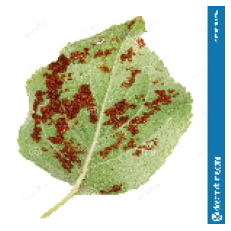

In [4]:
# Ploteamos un ejemplo
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.axis('off')
plt.show()

Para extraer los *feature maps* a visualizar, crearemos un modelo de Keras usando la clase `Model` en lugar de la clase `Sequential`. Esto nos permitirá tener mayor control sobre el modelo y así podremos tomar las activaciones correspondientes a las distintas capas intermedias.

In [5]:
len(model.layers)

28

In [6]:
from tensorflow.keras import models

# Tomamos los outputs de las primeras 8 capas iterando sobre
# las capas desde model.layers y tomamos su atributo .output
layer_outputs = [layer.output for layer in model.layers[3:len(model.layers)]]

# Creamos un modelo que tome el input del modelo y devuelva layer_outputs
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [7]:
layer_outputs

[<tf.Tensor 'res6last_health_branch2a/BiasAdd:0' shape=(None, 5, 5, 512) dtype=float32>,
 <tf.Tensor 'bn5last_health_branch2a/cond/Identity:0' shape=(None, 5, 5, 512) dtype=float32>,
 <tf.Tensor 'bn6last_health_branch2a/cond/Identity:0' shape=(None, 5, 5, 512) dtype=float32>,
 <tf.Tensor 'activation_6/Relu:0' shape=(None, 5, 5, 512) dtype=float32>,
 <tf.Tensor 'activation_9/Relu:0' shape=(None, 5, 5, 512) dtype=float32>,
 <tf.Tensor 'res5last_health_branch2b/BiasAdd:0' shape=(None, 5, 5, 512) dtype=float32>,
 <tf.Tensor 'res6last_health_branch2b/BiasAdd:0' shape=(None, 5, 5, 512) dtype=float32>,
 <tf.Tensor 'bn5last_health_branch2b/cond/Identity:0' shape=(None, 5, 5, 512) dtype=float32>,
 <tf.Tensor 'bn6last_health_branch2b/cond/Identity:0' shape=(None, 5, 5, 512) dtype=float32>,
 <tf.Tensor 'activation_7/Relu:0' shape=(None, 5, 5, 512) dtype=float32>,
 <tf.Tensor 'activation_10/Relu:0' shape=(None, 5, 5, 512) dtype=float32>,
 <tf.Tensor 'res5last_health_branch2c/BiasAdd:0' shape=(None

In [8]:
activation_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
resnet101v2 (Functional)        (None, 5, 5, 2048)   42626560    input_5[0][0]                    
__________________________________________________________________________________________________
res6last_health_branch2a (Conv2 (None, 5, 5, 512)    1049088     resnet101v2[0][0]                
__________________________________________________________________________________________________
res5last_health_branch2a (Conv2 (None, 5, 5, 512)    1049088     resnet101v2[0][0]                
_______________________________________________________________________________________

Vemos que el `input` de nuestro modelo es un objeto de tipo [`tf.Tensor`](https://www.tensorflow.org/api_docs/python/tf/Tensor), la estructura de datos de TensorFlow para almacenar información, similar a un `np.ndarray`:

In [9]:
activation_model.input

<tf.Tensor 'input_5:0' shape=(None, 150, 150, 3) dtype=float32>

El `output`, por su parte, es una lista de varios `tf.Tensor`, dentro de los que se almacenan las salidas de las capas convolucionales y de *pooling*:

In [10]:
activation_model.output

[<tf.Tensor 'res6last_health_branch2a/BiasAdd:0' shape=(None, 5, 5, 512) dtype=float32>,
 <tf.Tensor 'bn5last_health_branch2a/cond/Identity:0' shape=(None, 5, 5, 512) dtype=float32>,
 <tf.Tensor 'bn6last_health_branch2a/cond/Identity:0' shape=(None, 5, 5, 512) dtype=float32>,
 <tf.Tensor 'activation_6/Relu:0' shape=(None, 5, 5, 512) dtype=float32>,
 <tf.Tensor 'activation_9/Relu:0' shape=(None, 5, 5, 512) dtype=float32>,
 <tf.Tensor 'res5last_health_branch2b/BiasAdd:0' shape=(None, 5, 5, 512) dtype=float32>,
 <tf.Tensor 'res6last_health_branch2b/BiasAdd:0' shape=(None, 5, 5, 512) dtype=float32>,
 <tf.Tensor 'bn5last_health_branch2b/cond/Identity:0' shape=(None, 5, 5, 512) dtype=float32>,
 <tf.Tensor 'bn6last_health_branch2b/cond/Identity:0' shape=(None, 5, 5, 512) dtype=float32>,
 <tf.Tensor 'activation_7/Relu:0' shape=(None, 5, 5, 512) dtype=float32>,
 <tf.Tensor 'activation_10/Relu:0' shape=(None, 5, 5, 512) dtype=float32>,
 <tf.Tensor 'res5last_health_branch2c/BiasAdd:0' shape=(None

Cuando le damos una imagen de *input*, este modelo devuelve los valores de las activaciones de las capas de la base convolucional del modelo original. El modelo tiene un *input*, y los 8 *outputs* de las activaciones.

In [11]:
# Hacemos un feedforward con el img_tensor y la funcion .predict
activations = activation_model.predict(img_tensor)

Por ejemplo, ésta es la activación de la primer capa convolucional para nuestra imagen del gato:

In [12]:
# Imprimimos el shape de la activacion de la primer capa convolucional para esta imagen
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 5, 5, 512)


Éste es feature map de 148x148 con 32 canales. Probemos visualizando el 3er canal:

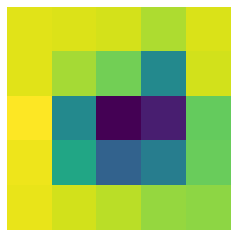

In [13]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')
plt.axis('off')
plt.show()

Este canal codifica un detector bordes curvos. Probemos con el canal 30 -- notemos que pueden variar ya que el aprendizaje de las capas convolucionales no es determinista.

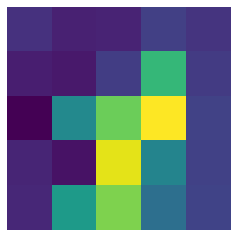

In [14]:
plt.matshow(first_layer_activation[0, :, :, 50], cmap='viridis')
plt.axis('off')
plt.show()

Éste parece un "detector de puntos verdes brillantes", quizás útil para felinos. Visualicemos ahora los filtros para los 8 mapas de activacion.

In [ ]:
# Imprimimos todas las activaciones 
# Usamos los nombres de las capas para el plot
# De cada model.layers guardamos el layer.name

layer_names = []
for layer in model.layers[1:len(model.layers)]:
    layer_names.append(layer.name)

images_per_row = 16

# Ahora veamos nuestros feature maps
# Iteramos las activaciones y los layer_names
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]

    # Shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # Matriz para mostrar las activaciones
    n_rows = n_features // images_per_row
    display_grid = np.zeros((size * n_rows, images_per_row * size))

    for row in range(n_rows):
        for col in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             row * images_per_row + col]
            
            # Postprocesado para mejorar la estética
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[row * size : (row + 1) * size,
                         col * size : (col + 1) * size] = channel_image

    # Display
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.axis('off')
    
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


Cosas a notar:

* La primera capa actúa como una colección de varios detectores de bordes. Los filtros retienen casi toda la información original.
* Al subir a las siguientes capas, sube el nivel de abstracción y baja la interpretabilidad visual. Empiezan a codificar entes de más alto nivel como "oreja de gato" u "ojo de gato". Estas capas tienen cada vez menos información del contenido visual de la imagen y más sobre la clase de la imagen.
* La *sparcity* de las activaciones aumenta con la profundidad de la capa. En la primera capa, todos los filtros son activados por el *input*, pero en las siguientes capas muestran más vacío, por no aparecer esos patrones en la imagen.

Esta propiedad de  *__information distillation pipeline__* que muestran las *convnets* es muy importante. Recibe datos crudos como *input*, y aplica transformaciones repetidamente para filtrar la información irrelevante mientras aumenta y refina la útil.

## Visualizando filtros de las *convnets*

Otra forma simple de inspeccionar los filtros aprendidos por una *convnet* es mostrar el patrón visual al que cada filtro responde. Esto se hace con *__gradient ascent__* en el espacio de *input*, aplicándolo al valor de *input* de forma que maximice la respuesta de un filtro específico, empezando con una imagen aleatoria. **La imagen resultante de *input* es la que maximiza la respuesta del filtro elegido**.

Veamos cómo podemos generar los patrones visuales a los que responden los filtros del modelo VGG16:

In [15]:
import tensorflow as tf
# from tensorflow.keras.applications import VGG16

# # Cargamos el modelo VGG16 con los pesos de imagenet (con include_top = False)
# model = VGG16(weights='imagenet', include_top = False)
# model.summary()

El proceso consistirá en construir una función de "pérdida" que maximiza el valor de un filtro particular en una capa convolucional dada, y luego usar *stochastic gradient ascent* para ajustar los valores de la imagen de entrada de forma de que maximice este valor de activación.

Consideremos el filtro 0 de la capa `block3_conv1` de la red VGG16, preentrenada en ImageNet:

In [16]:
# Definimos la capa y el filtro de interés
layer_name = 'res6last_health_branch2a'
filter_index = 0

# Con el metodo .get_layer() y su atributo .output tomamos el output de la capa elegida
layer_output = model.get_layer(layer_name).output

Definimos una función para calcular la "pérdida", es decir, la media de la activación del filtro de interés:

In [17]:
def compute_loss(input_image, layer_name, filter_index):
    
    # Obtenemos la capa de interés con get_layer()
    layer = model.get_layer(name=layer_name)
    
    # Definimos un modelo que toma un input y devuelve el output de la layer elegida
    feature_extractor = models.Model(inputs=model.inputs, outputs=layer.output)
    
    # Almacenamos la activación, es decir, el conjunto de feature maps de salida
    activation = feature_extractor(input_image)
    
    # Indexamos el filtro de interés
    filter_activation = activation[:, :, :, filter_index]
    
    # El método tf.reduce_mean() calcula la media de los elementos a lo largo de las dimensiones de un tensor
    return tf.reduce_mean(filter_activation)

Para implementar los pasos del *gradient ascent*, necesitamos el gradiente de la pérdida con respecto al *input*. Para esto, definimos la función `gradient_ascent_step()`, en que hacemos uso de [`tf.GradientTape()`](https://www.tensorflow.org/api_docs/python/tf/GradientTape) para obtener los gradientes de la pérdida con respecto a la imagen:

In [18]:
def gradient_ascent_step(img, layer_name, filter_index, learning_rate):
    
    # Creamos un contexto para guardar las operaciones de diferenciación automática
    with tf.GradientTape() as tape:
        # Con watch() indicamos qué variable queremos observar y actualizar
        tape.watch(img)
        loss = compute_loss(img, layer_name, filter_index)

    # Computamos los gradientes
    grads = tape.gradient(loss, img)
    # Normalizamos gradientes
    # Asegura que la magnitud de los updates aplicados a la imagen de input esté siempre en el mismo rango
    grads = tf.math.l2_normalize(grads)
    
    # Actualizamos la imagen de input con gradient ascent
    img += learning_rate * grads
    return loss, img

Definimos una función para inicializar una imagen aleatoria a partir de ruido, `initialize_image()`:

In [19]:
def initialize_image(size):
    # Creamos una imagen inicial a partir de ruido aleatorio
    img = tf.random.uniform((1, size, size, 3)) # Tensor 4D
    return img

La imagen resultante es un tensor de forma (1, `size`, `size`, 3) de tipo float con valores entre [0, 255]. Para mostrarlo como imagen, usamos la siguiente función `deprocess_image()`:

In [20]:
def deprocess_image(img):
    # Normalizamos el array con media 0. y desvío 0.1
    img -= img.mean()
    img /= img.std() + 1e-5
    img *= 0.1

    # Clip a [0, 1]
    img += 0.5
    img = np.clip(img, 0, 1)

    # Mapeamos a un RGB array
    img *= 255
    img = np.clip(img, 0, 255).astype("uint8")
    return img

Ahora que tenemos todas las piezas, juntémoslas con una función `visualize_filter()`, que toma la capa de *input* y un índice de filtro, itera los pasos del *gradient ascent* y devuelve un tensor válido como imagen representando el patrón que maximiza la activación de ese filtro particular:

In [21]:
def visualize_filter(layer_name, filter_index, size):
    # Iterarmos el gradient ascent por 40 steps con una learning rate de 10
    iterations = 40
    learning_rate = 10.
    img = initialize_image(size)
    for iteration in range(iterations):
        loss, img = gradient_ascent_step(img, layer_name, filter_index, learning_rate)

    # Decodificamos el resultado
    img = deprocess_image(img[0].numpy())
    return loss, img

Exploremos qué resultado obtenemos para el filtro 0 de la capa `block3_conv1` de la VGG16:

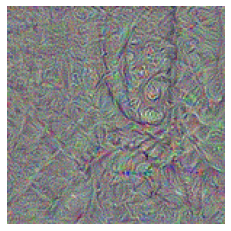

In [22]:
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import save_img

# Definimos las dimensiones de la imagen de input
img_width = 150
img_height = 150

# Corremos la función visualize_filter()
loss, img = visualize_filter(layer_name, filter_index, 150)

plt.imshow(img)
plt.axis('off');

# Guardamos la imagen
save_img(f'{filter_index}-{layer_name}.png', img)

Parece que el filtro 0 en la capa `block3_conv1` es responsable de un patrón de "puntos polka".

Ahora vamos a ver filtros en todas las capas. Para simplificar, vemos los primeras 64 de cada capa, y vemos la primer capa de distintos bloques de convolución:

In [23]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
resnet101v2 (Functional)        (None, 5, 5, 2048)   42626560    input_5[0][0]                    
__________________________________________________________________________________________________
res5last_health_branch2a (Conv2 (None, 5, 5, 512)    1049088     resnet101v2[0][0]                
__________________________________________________________________________________________________
res6last_health_branch2a (Conv2 (None, 5, 5, 512)    1049088     resnet101v2[0][0]                
_______________________________________________________________________________________

In [24]:
# Ploteamos las activaciones de output para los bloques enumerados
# Para eso usamos plt.imshow() de Matplotlib

layer_names = ['res5last_health_branch2a', 'res6last_health_branch2a', 'res5last_health_branch2b', 'res6last_health_branch2b']
size = 64
margin = 5

# Ésta es una imagen vacía donde guardaremos los resultados
results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

# Generamos una grilla de filtros por capa
for layer_name in layer_names: # Iteramos sobre capas
    for i in range(8):  # Iteramos sobre filas
        for j in range(8):  # Iteramos sobre las columnas
            # Generamos el patrón para el filtro `i + (j * 8)` con `layer_name`
            # usando visualize_filter()
            filter_img = visualize_filter(layer_name, i + (j * 8), size)[1]

            # Ubicamos el cuadrado `(i, j)` en la grilla de resultados
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # Display
    plt.figure(figsize = (20, 20))
    plt.imshow(results / 255)
    plt.title(layer_name)
    plt.axis('off')
    plt.show()
    
    # Guardamos la grilla de filtros
    save_img(f'{layer_name}.png', results)

Output hidden; open in https://colab.research.google.com to view.

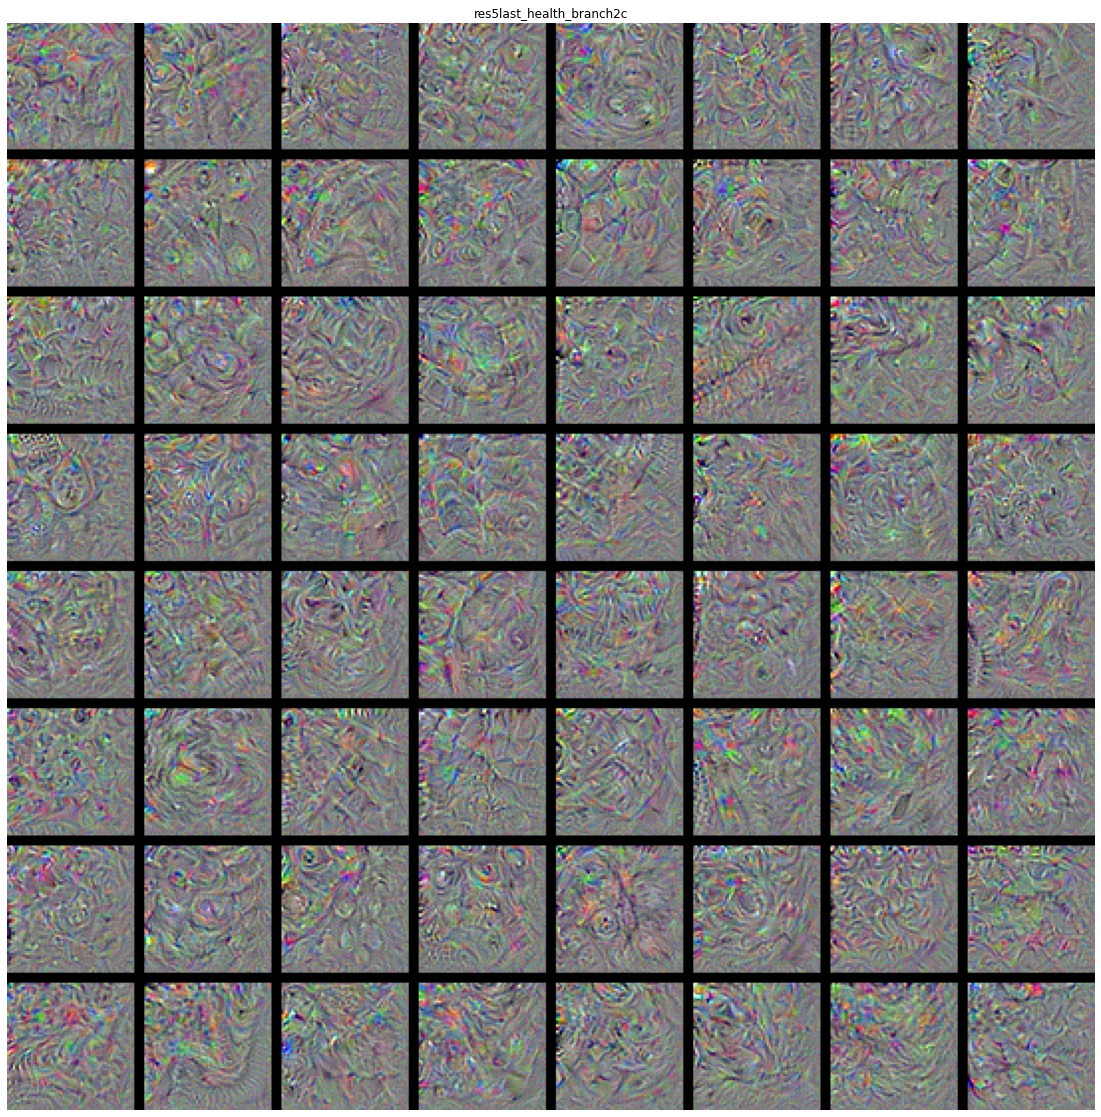

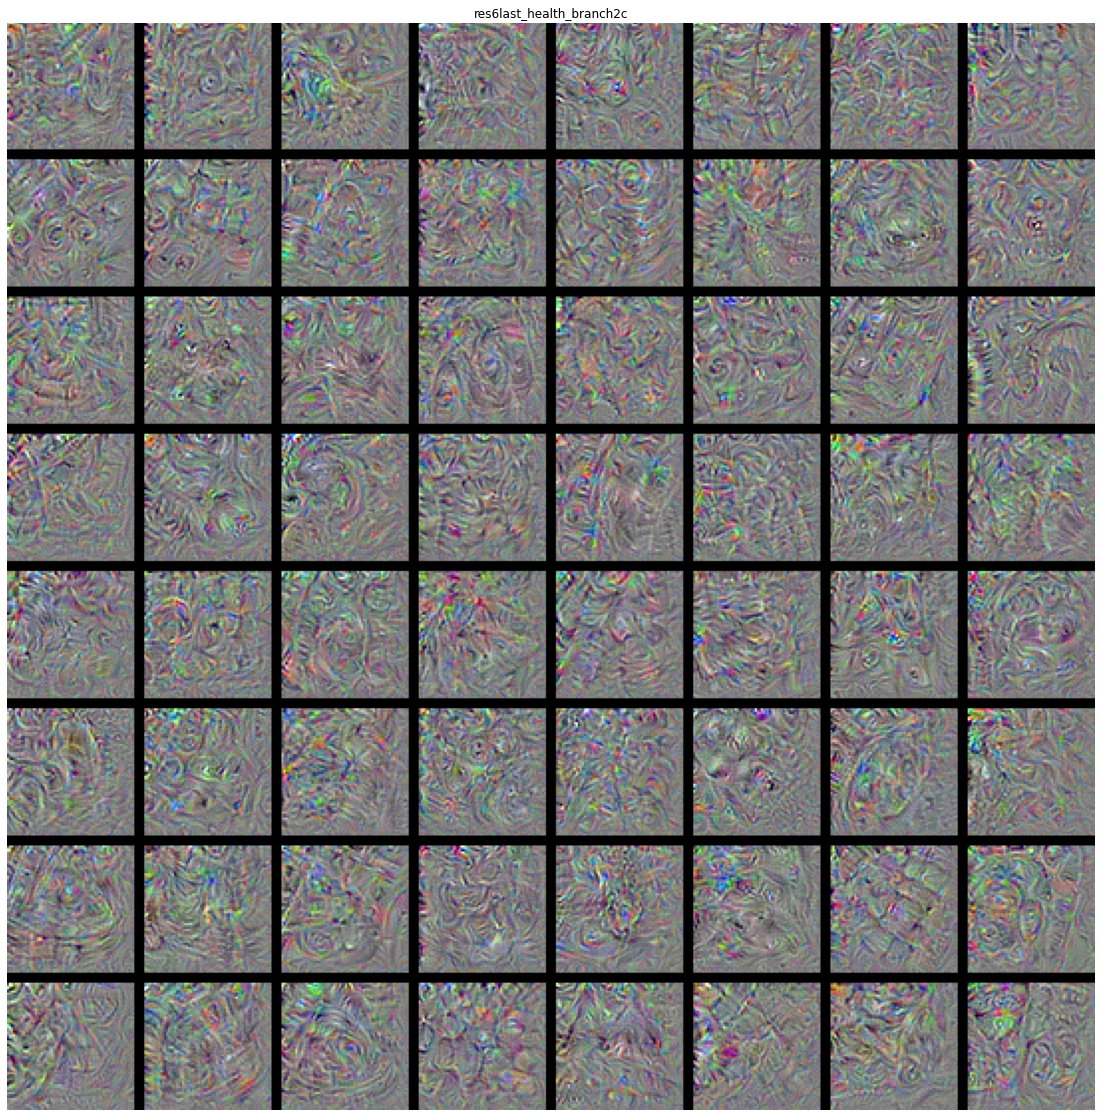

In [25]:
# Ploteamos las activaciones de output para los bloques enumerados
# Para eso usamos plt.imshow() de Matplotlib

layer_names = ['res5last_health_branch2c', 'res6last_health_branch2c']
size = 64
margin = 5

# Ésta es una imagen vacía donde guardaremos los resultados
results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

# Generamos una grilla de filtros por capa
for layer_name in layer_names: # Iteramos sobre capas
    for i in range(8):  # Iteramos sobre filas
        for j in range(8):  # Iteramos sobre las columnas
            # Generamos el patrón para el filtro `i + (j * 8)` con `layer_name`
            # usando visualize_filter()
            filter_img = visualize_filter(layer_name, i + (j * 8), size)[1]

            # Ubicamos el cuadrado `(i, j)` en la grilla de resultados
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # Display
    plt.figure(figsize = (20, 20))
    plt.imshow(results / 255)
    plt.title(layer_name)
    plt.axis('off')
    plt.show()
    
    # Guardamos la grilla de filtros
    save_img(f'{layer_name}.png', results)

Estas visualizaciones explican mucho de cómo los convnets "ven", entendiendo los *inputs* como combinaciones de *features* organizados en niveles de abstracción.

* Los filtros de la primera capa  (`block1_conv1`) tienen bordes y colores simples.
* Los de  `block2_conv1` guardan texturas de combinaciones de bordes y colores.
* Los filtros de las capas de más alto nivel empiezan a remitir a imágenes naturales como plumas, ojos, hojas...